# Table data extraction to excel

This example uses Textractor to convert an image to an Microsoft Office Excel file that can be further processed manually.

## Installation

To begin, install the `amazon-textract-textractor` package using pip.

`pip install amazon-textract-textractor`

There are various sets of dependencies available to tailor your installation to your use case. The base package will have sensible default, but you may want to install the PDF extra dependencies if you workflow uses PDFs with `pip install amazon-textract-textractor[pdf]`. You can read more on extra dependencies [in the documentation](https://aws-samples.github.io/amazon-textract-textractor/installation.html)

## Calling Textract

In [1]:
import os
from PIL import Image
from textractor import Textractor
from textractor.visualizers.entitylist import EntityList
from textractor.data.constants import TextractFeatures, Direction, DirectionalFinderType

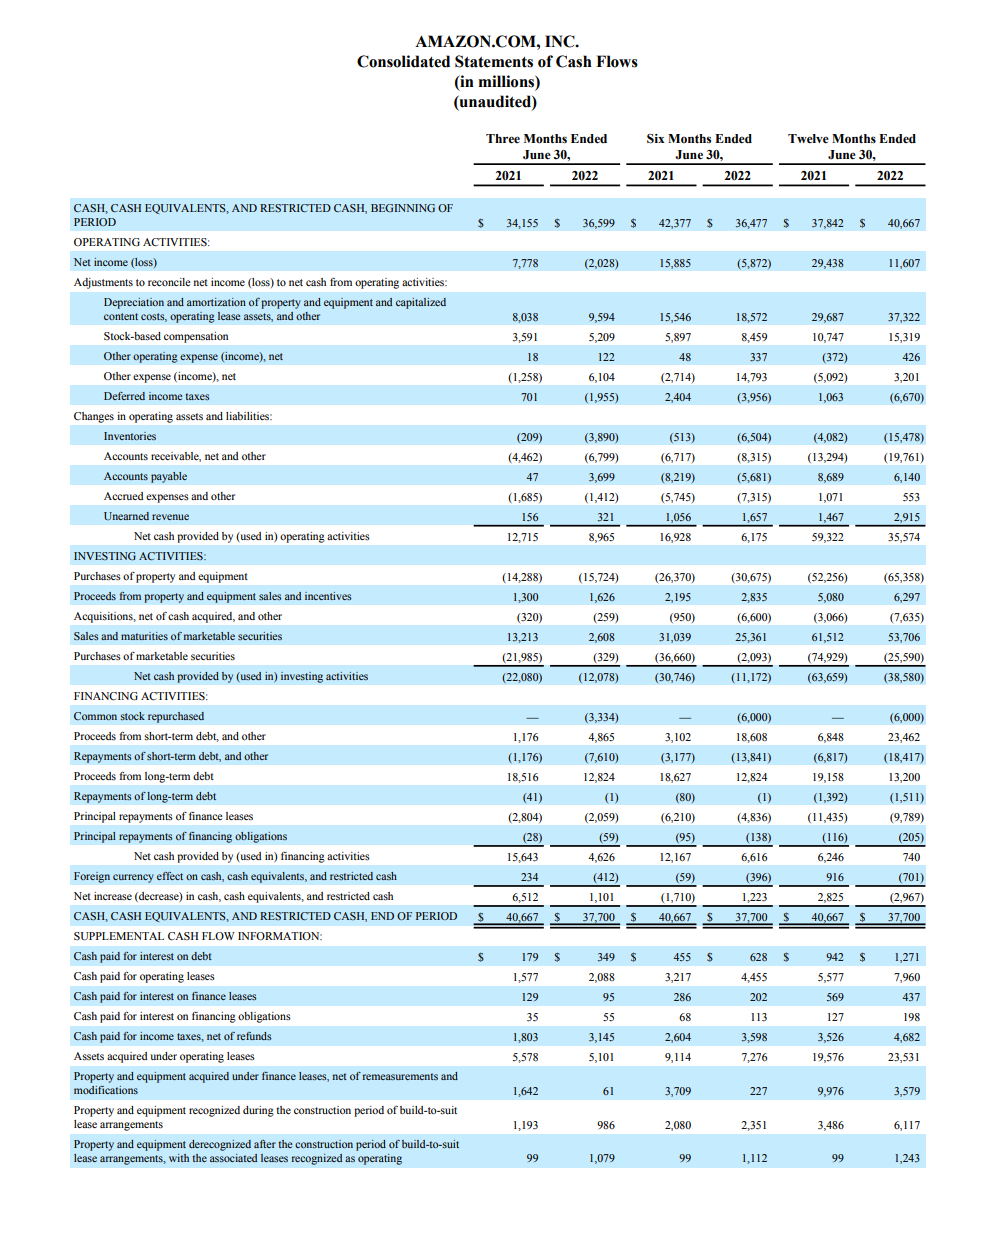

In [2]:
image = Image.open("../../../tests/fixtures/amzn_q2.png")
image

In [3]:
extractor = Textractor(aws_profile_name='default')

document = extractor.analyze_document(
    file_source=image,
    features=[TextractFeatures.TABLES], 
    save_image=True
)

In [4]:
document

This document holds the following data:
Pages - 1
Words - 564
Lines - 318
Key-values - 0
Checkboxes - 0
Tables - 1
Identity Documents - 0

As expected, Textract Identified the table, let's see how it looks.

In [5]:
table = document.tables[0]

## Table as a pandas DataFrame

In [8]:
table.to_pandas()

,0,1,2,3,4,5,6
0,,Three Months June,"30, Ended",Six Months June,"Ended 30,",Twelve Months June,"30, Ended"
1,,2021,2022,2021,2022,2021,2022
2,,,,,,,
3,"CASH, PERIOD CASH EQUIVALENTS, AND RESTRICTED ...","$ 34,155","$ 36,599","$ 42,377","$ 36,477","$ 37,842","$ 40,667"
4,OPERATING ACTIVITIES:,,,,,,
5,Net income (loss),"7,778","(2,028)","15,885","(5,872)","29,438","11,607"
6,Adjustments to reconcile net income (loss) to ...,,,,,,
7,"Depreciation content costs, and operating amor...","8,038","9,594","15,546","18,572","29,687","37,322"
8,Stock-based compensation,"3,591","5,209","5,897","8,459","10,747","15,319"
9,"Other operating expense (income), net",18,122,48,337,(372),426


## Table as CSV

This is a shorthand for table.to_pandas().to_csv(). 

In [9]:
table.to_csv()

',0,1,2,3,4,5,6\n0,,Three Months June,"30, Ended",Six Months June,"Ended 30,",Twelve Months June,"30, Ended"\n1,,2021,2022,2021,2022,2021,2022\n2,,,,,,,\n3,"CASH, PERIOD CASH EQUIVALENTS, AND RESTRICTED CASH, BEGINNING OF","$ 34,155","$ 36,599","$ 42,377","$ 36,477","$ 37,842","$ 40,667"\n4,OPERATING ACTIVITIES:,,,,,,\n5,Net income (loss),"7,778","(2,028)","15,885","(5,872)","29,438","11,607"\n6,Adjustments to reconcile net income (loss) to net cash from operating activities:,,,,,,\n7,"Depreciation content costs, and operating amortization lease of assets, property and and other equipment and capitalized","8,038","9,594","15,546","18,572","29,687","37,322"\n8,Stock-based compensation,"3,591","5,209","5,897","8,459","10,747","15,319"\n9,"Other operating expense (income), net",18,122,48,337,(372),426\n10,"Other expense (income), net","(1,258)","6,104","(2,714)","14,793","(5,092)","3,201"\n11,Deferred income taxes,701,"(1,955)","2,404","(3,956)","1,063","(6,670)"\n12,Changes in operating 

## Table to Microsoft Office Excel

The only format that supports merged cells.

In [11]:
table.to_excel("out.xlsx")

## Conclusion

Textractor makes it easy to go from one format to another and streamline your table processing workflows.